In [1]:
import tensorflow as tf
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers
# from keras.layers.experimental.preprocessing import Normalization
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Uploading the data

In [ ]:
# df = np.load('drive/MyDrive/Intro_to_DP/images.npy')
# labels = np.load('drive/MyDrive/Intro_to_DP/labels.npy')

In [2]:
df = np.load('data/images.npy')
labels = np.load('data/labels.npy')

Normalizing the input data

In [3]:
normalizer_layer = tf.keras.layers.LayerNormalization(axis=1)

output = normalizer_layer(df)

In [4]:
data = np.array(output)

## First apporach: Create a 720 class classification (classes coresponds to the minutes on the clock)

In [5]:
labels_v2 = labels[:,0]*60 + labels[:,1]

In [6]:
X_train, X_test, y_train, y_test = train_test_split(data,labels_v2,test_size = 0.2,random_state = 0)

In [7]:
model = tf.keras.Sequential([
    layers.Conv2D(20, ((5,5)),strides =[2,2] ,activation = 'relu', input_shape = (150,150,1)),
    # layers.MaxPooling2D(2,2),

    layers.Conv2D(40, ((4,4)),activation = 'relu', input_shape = (73,73,10)),
    layers.MaxPooling2D(2,2),

    layers.Conv2D(75, ((4,4)), activation = 'relu', input_shape = (35,35,30)),
    # layers.MaxPooling2D(2,2),

    layers.Conv2D(100, ((3,3)), activation = 'relu', input_shape = (15,15,50)),
    layers.MaxPooling2D(pool_size=(2,2)),

    layers.Conv2D(125, (3,3), activation = 'relu', input_shape = (13,13,60)),
    # layers.MaxPooling2D(2,2),

    layers.Conv2D(150, (3,3), activation = 'relu', input_shape = (3,3,75)),
    layers.MaxPooling2D(2,2),

    layers.Conv2D(200, (3,3), activation = 'relu', input_shape = (5,5,200)),
    # layers.Conv2D(150, (3,3), activation = 'relu', input_shape = (3,3,200)),
    # layers.Conv2D(120, (3,3), activation = 'relu', input_shape = (150,150,1)),
    # layers.MaxPooling2D(2,2),

    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    # layers.Dense(640, activation='relu'),
    layers.Dense(720)
])

In [8]:
model = tf.keras.Sequential([
    layers.Conv2D(20, ((4,4)),activation = 'relu', input_shape = (150,150,1)),
    # layers.MaxPooling2D(2,2),

    layers.Conv2D(40, ((3,3)),activation = 'relu', input_shape = (145,145,20)),
    layers.MaxPooling2D(2,2),

    layers.Conv2D(75, ((3,3)), activation = 'relu', input_shape = (72,72,40)),
    # layers.MaxPooling2D(2,2),

    layers.Conv2D(100, ((3,3)), activation = 'relu', input_shape = (68,68,75)),
    layers.MaxPooling2D(pool_size=(2,2)),

    layers.Conv2D(125, (3,3), activation = 'relu', input_shape = (34,34,100)),
    # layers.MaxPooling2D(2,2),

    layers.Conv2D(150, (3,3), activation = 'relu', input_shape = (3,3,75)),
    layers.MaxPooling2D(2,2),

    layers.Conv2D(200, (3,3), activation = 'relu', input_shape = (5,5,200)),
    layers.Conv2D(200, (3,3), activation = 'relu', input_shape = (5,5,200)),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(200, (3,3), activation = 'relu', input_shape = (5,5,200)),
    # layers.Conv2D(150, (3,3), activation = 'relu', input_shape = (3,3,200)),
    # layers.Conv2D(120, (3,3), activation = 'relu', input_shape = (150,150,1)),
    # layers.MaxPooling2D(2,2),

    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    # layers.Dense(256, activation='tanh'),
    layers.Dense(720)
])

In [9]:
opt = tf.keras.optimizers.Adam(learning_rate=0.0003)
# model.compile(optimizer=tf.keras.optimizers.RMSprop(),
#               loss=tf.keras.losses.sparse_categorical_crossentropy,
#               metrics=['accuracy'])
model.compile(optimizer=opt,
              loss=tf.keras.losses.sparse_categorical_crossentropy,
              metrics=['accuracy'])

In [10]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 147, 147, 20)      340       
                                                                 
 conv2d_8 (Conv2D)           (None, 145, 145, 40)      7240      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 72, 72, 40)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 70, 70, 75)        27075     
                                                                 
 conv2d_10 (Conv2D)          (None, 68, 68, 100)       67600     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 34, 34, 100)      0         
 2D)                                                  

In [ ]:
history = model.fit(X_train, y_train, epochs=10, batch_size = 256, validation_data = (X_test, y_test))

Epoch 1/10
13/57 [=====>........................] - ETA: 4:19 - loss: 12.8630 - accuracy: 0.0024

Second Approach: Regression

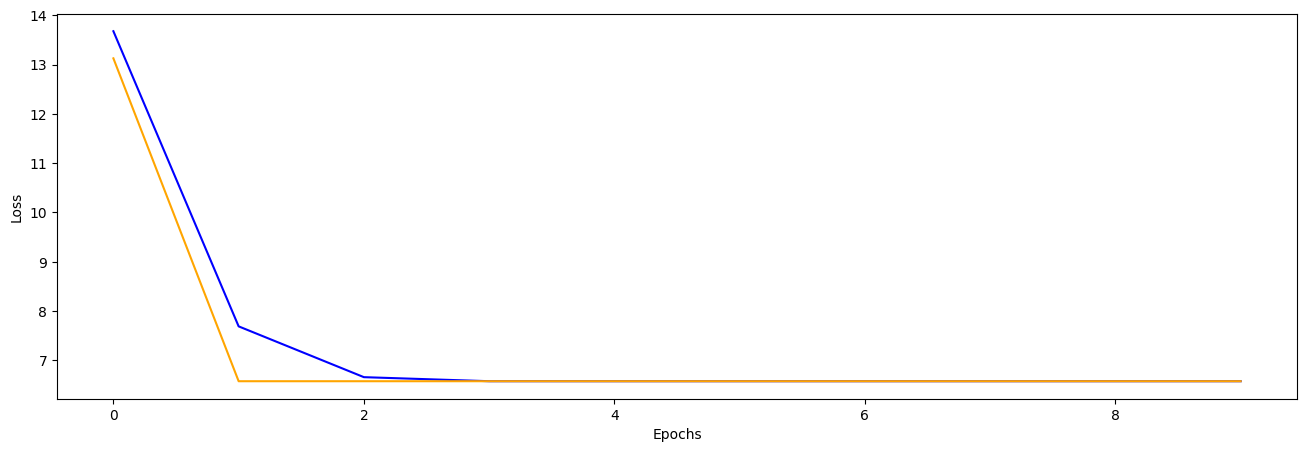

In [ ]:
plt.figure(figsize=(16,5))
plt.plot(history.history['loss'],color='blue')
plt.plot(history.history['val_loss'],color='orange')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

In [ ]:
labels_v3 = labels[:,0]*60 + labels[:,1]

In [ ]:
def scaler(X,max,min):
  X_scaled = (X - np.min(X)) / (np.max(X) - np.min(X)) * (max - min) + min
  return X_scaled

Here is the data transformed into a

In [ ]:
scaled_labels =scaler(labels_v3,12,0)
scaled_labels.astype(float)

array([ 0.,  0.,  0., ..., 12., 12., 12.])

In [ ]:
normalizer_layer = tf.keras.layers.LayerNormalization()

output = normalizer_layer(scaled_labels)

In [ ]:
output.shape

TensorShape([18000])

In [ ]:
from keras import backend as K
K.clear_session()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data,output,test_size = 0.2,random_state = 0)

TypeError: ignored

In [ ]:
model = tf.keras.Sequential([
    layers.Conv2D(20, ((5,5)),strides =[2,2] ,activation = 'tanh', input_shape = (150,150,1)),
    # layers.MaxPooling2D(2,2),

    layers.Conv2D(40, ((4,4)),activation = 'tanh', input_shape = (73,73,10)),
    layers.MaxPooling2D(2,2),

    layers.Conv2D(75, ((4,4)), activation = 'tanh', input_shape = (35,35,30)),
    # layers.MaxPooling2D(2,2),

    layers.Conv2D(100, ((3,3)), activation = 'tanh', input_shape = (15,15,50)),
    layers.MaxPooling2D(pool_size=(2,2)),

    layers.Conv2D(125, (3,3), activation = 'tanh', input_shape = (13,13,60)),
    # layers.MaxPooling2D(2,2),

    layers.Conv2D(150, (3,3), activation = 'tanh', input_shape = (3,3,75)),
    layers.MaxPooling2D(2,2),

    layers.Conv2D(200, (3,3), activation = 'tanh', input_shape = (5,5,200)),
    # layers.Conv2D(150, (3,3), activation = 'relu', input_shape = (3,3,200)),
    # layers.Conv2D(120, (3,3), activation = 'relu', input_shape = (150,150,1)),
    # layers.MaxPooling2D(2,2),

    layers.Flatten(),
    layers.Dense(512, activation='tanh'),
    layers.Dense(256, activation='tanh'),
    layers.Dense(1)
])

In [ ]:
model = tf.keras.Sequential([
    layers.Conv2D(20, ((4,4)),activation = 'tanh', input_shape = (150,150,1)),
    # layers.MaxPooling2D(2,2),

    layers.Conv2D(40, ((3,3)),activation = 'tanh', input_shape = (145,145,20)),
    layers.MaxPooling2D(2,2),

    layers.Conv2D(75, ((3,3)), activation = 'tanh', input_shape = (72,72,40)),
    # layers.MaxPooling2D(2,2),

    layers.Conv2D(100, ((3,3)), activation = 'tanh', input_shape = (68,68,75)),
    layers.MaxPooling2D(pool_size=(2,2)),

    layers.Conv2D(125, (3,3), activation = 'tanh', input_shape = (34,34,100)),
    # layers.MaxPooling2D(2,2),

    layers.Conv2D(150, (3,3), activation = 'tanh', input_shape = (3,3,75)),
    layers.MaxPooling2D(2,2),

    layers.Conv2D(200, (3,3), activation = 'tanh', input_shape = (5,5,200)),
    layers.Conv2D(200, (3,3), activation = 'tanh', input_shape = (5,5,200)),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(200, (3,3), activation = 'tanh', input_shape = (5,5,200)),
    # layers.Conv2D(150, (3,3), activation = 'relu', input_shape = (3,3,200)),
    # layers.Conv2D(120, (3,3), activation = 'relu', input_shape = (150,150,1)),
    # layers.MaxPooling2D(2,2),

    layers.Flatten(),
    layers.Dense(512, activation='tanh'),
    layers.Dense(256, activation='tanh'),
    layers.Dense(1)
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 147, 147, 20)      340       
                                                                 
 conv2d_1 (Conv2D)           (None, 145, 145, 40)      7240      
                                                                 
 max_pooling2d (MaxPooling2  (None, 72, 72, 40)        0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 70, 70, 75)        27075     
                                                                 
 conv2d_3 (Conv2D)           (None, 68, 68, 100)       67600     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 34, 34, 100)       0         
 g2D)                                                   

In [ ]:
opt = tf.keras.optimizers.Adam(learning_rate=0.003)
# model.compile(optimizer=tf.keras.optimizers.RMSprop(),
#               loss=tf.keras.losses.sparse_categorical_crossentropy,
#               metrics=['accuracy'])
model.compile(optimizer=opt,
              loss=tf.keras.losses.MeanSquaredError(),
              metrics=['accuracy'])

In [ ]:
history = model.fit(X_train, y_train, epochs=30, batch_size = 256, validation_data = (X_test, y_test))

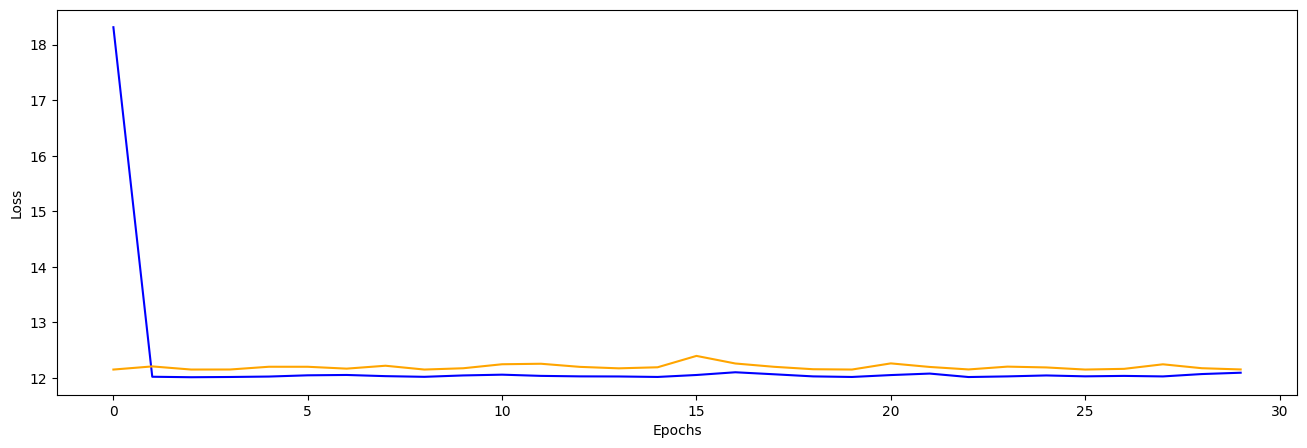

In [ ]:
plt.figure(figsize=(16,5))
plt.plot(history.history['loss'],color='blue')
plt.plot(history.history['val_loss'],color='orange')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

In [ ]:
model.save('regression_model')

## Multi head model

Here is the model that uses one convulitional network and then the outputs are based on two different fully conected linear networks


In [ ]:
cnn_model = tf.keras.Sequential([
      layers.Conv2D(20, ((4,4)),activation = 'tanh', input_shape = (150,150,1)),
      # layers.MaxPooling2D(2,2),

      layers.Conv2D(40, ((3,3)),activation = 'tanh', input_shape = (145,145,20)),
      layers.MaxPooling2D(2,2),

      layers.Conv2D(75, ((3,3)), activation = 'tanh', input_shape = (72,72,40)),
      # layers.MaxPooling2D(2,2),

      layers.Conv2D(100, ((3,3)), activation = 'tanh', input_shape = (68,68,75)),
      layers.MaxPooling2D(pool_size=(2,2)),

      layers.Conv2D(125, (3,3), activation = 'tanh', input_shape = (34,34,100)),
      # layers.MaxPooling2D(2,2),

      layers.Conv2D(150, (3,3), activation = 'tanh', input_shape = (3,3,75)),
      layers.MaxPooling2D(2,2),

      layers.Conv2D(200, (3,3), activation = 'tanh', input_shape = (5,5,200)),
      layers.Conv2D(200, (3,3), activation = 'tanh', input_shape = (5,5,200)),
      layers.MaxPooling2D(2,2),
      layers.Conv2D(200, (3,3), activation = 'tanh', input_shape = (5,5,200)),
      # layers.Conv2D(150, (3,3), activation = 'relu', input_shape = (3,3,200)),
      # layers.Conv2D(120, (3,3), activation = 'relu', input_shape = (150,150,1)),
      # layers.MaxPooling2D(2,2),

      layers.Flatten()])

fully_conected_minutes =    tf.keras.Sequential([ layers.Dense(512, activation='relu'),
      layers.Dense(256, activation='relu'),
      layers.Dense(60)])

fully_connected_hours = tf.keras.Sequential([ layers.Dense(512, activation='relu'),
      layers.Dense(256, activation='relu'),
      layers.Dense(12)])



In [ ]:
model = tf.keras.models.Model(outputs =[fully_connected_hours,fully_conected_minutes])

TypeError: ignored